In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the cleaned CSV
df = pd.read_csv('credit_card_default_cleaned.csv')
df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,TOTAL_BILL,TOTAL_PAID,PAY_RATIO,AVG_DELAY
0,20000.0,Female,University,Married,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,1,7704.0,689.0,0.089434,0.666667
1,120000.0,Female,University,Single,26,-1,2,0,0,0,...,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0,5000.0,0.292791,0.666667
2,90000.0,Female,University,Single,34,0,0,0,0,0,...,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0,11018.0,0.108388,0.000000
3,50000.0,Female,University,Married,37,0,0,0,0,0,...,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0,8388.0,0.036259,0.000000
4,50000.0,Male,University,Married,57,-1,0,-1,0,0,...,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0,59049.0,0.540054,0.000000


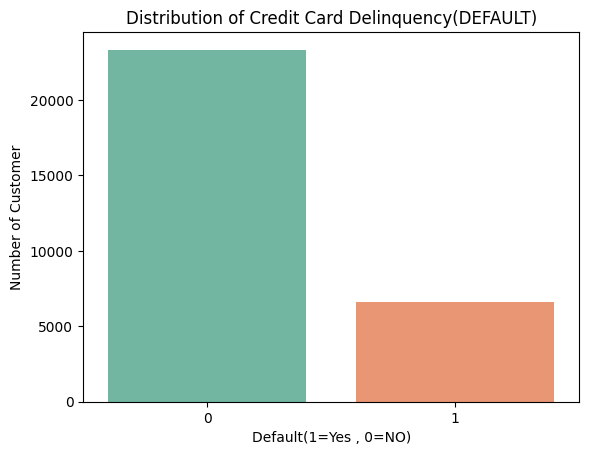

In [3]:
#Distribution of defaulter vs non-defaulter
plt.figure(figure=(6,4))
sns.countplot(x='DEFAULT', hue='DEFAULT', data = df, palette = 'Set2',legend=False)
plt.title('Distribution of Credit Card Delinquency(DEFAULT)')
plt.xlabel('Default(1=Yes , 0=NO)')
plt.ylabel('Number of Customer')
plt.show()

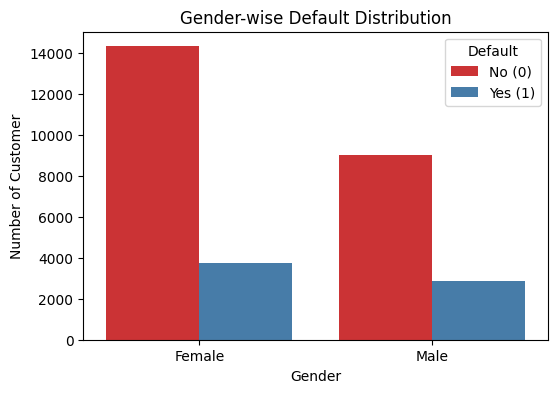

In [4]:
#Gender-wise Default Analysis
plt.figure(figsize=(6,4))
sns.countplot(x='SEX' , hue = 'DEFAULT', data=df, palette='Set1')
plt.title('Gender-wise Default Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Customer')
plt.legend(title='Default', labels=['No (0)', 'Yes (1)'])
plt.show()

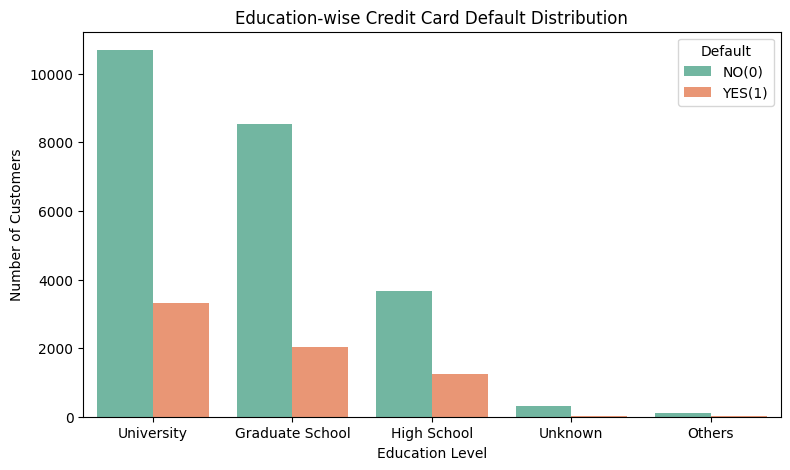

In [5]:
#Eduction-wise Default Analysis
plt.figure(figsize=(9,5))
sns.countplot(x='EDUCATION' , hue = 'DEFAULT' , data=df, palette= 'Set2')
plt.title('Education-wise Credit Card Default Distribution')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.legend(title='Default', labels=['NO(0)', 'YES(1)'])
plt.show()

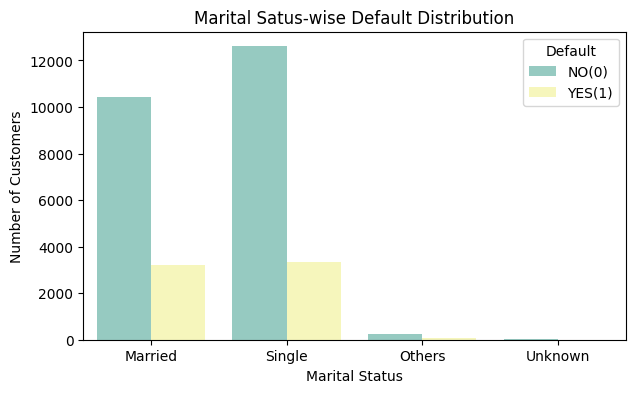

In [6]:
# Marriage-wise Default Analysis
plt.figure(figsize=(7,4))
sns.countplot(x='MARRIAGE' , hue= 'DEFAULT' , data=df, palette='Set3')
plt.title('Marital Satus-wise Default Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.legend(title='Default', labels=['NO(0)', 'YES(1)'])
plt.show()

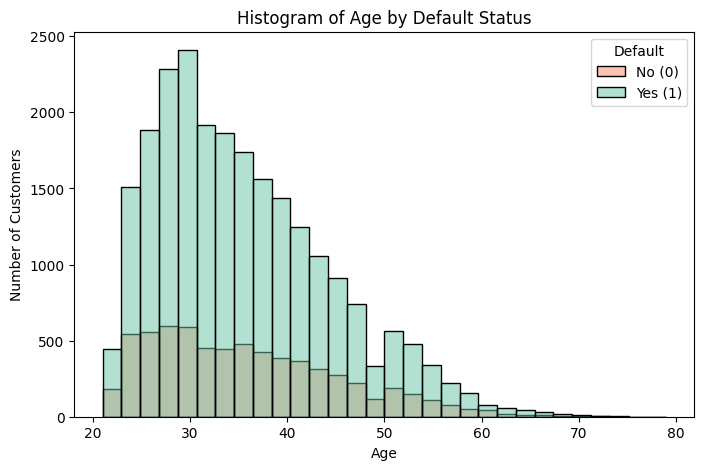

In [7]:
#Age Distribution VS Default
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='AGE', hue='DEFAULT', bins=30, palette='Set2')
plt.title('Histogram of Age by Default Status')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.legend(title='Default', labels=['No (0)', 'Yes (1)'])
plt.show()
    

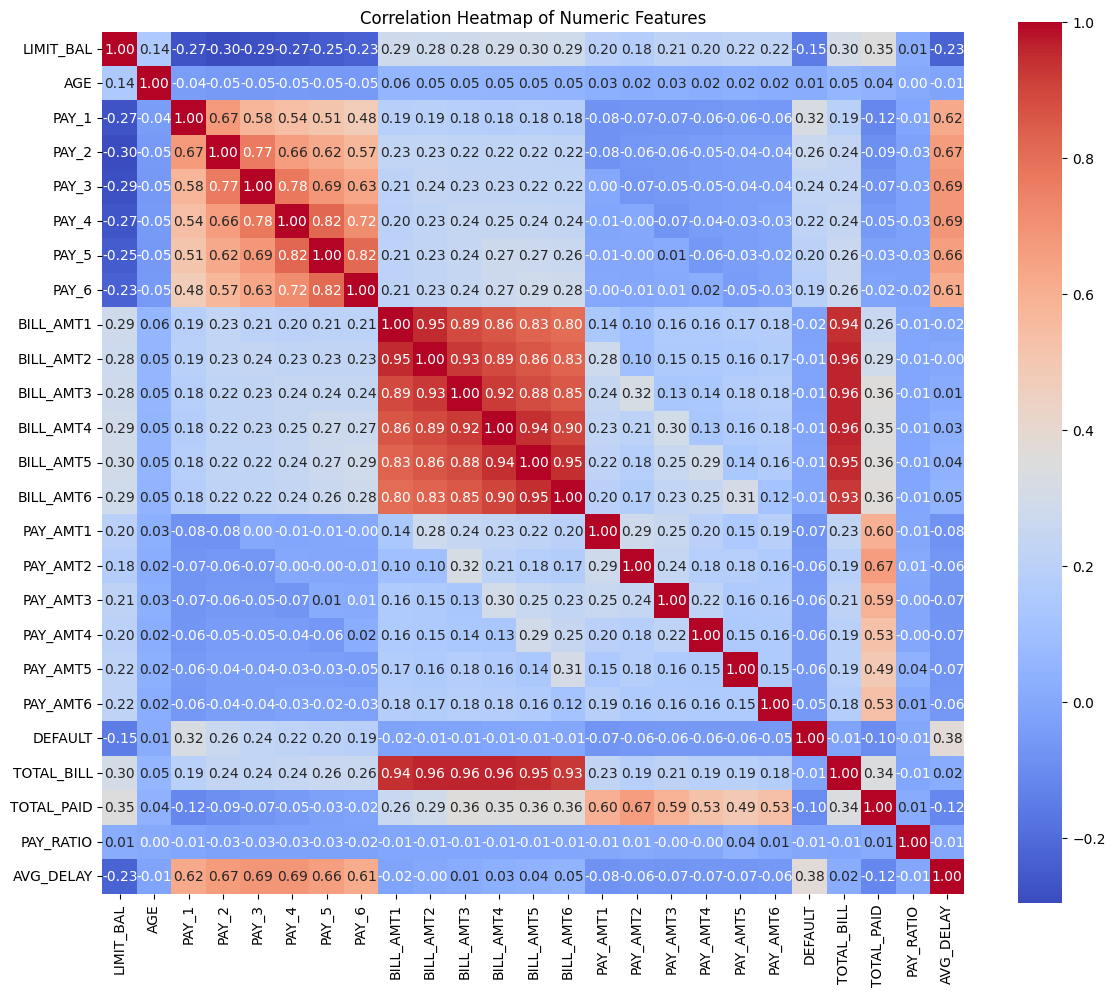

In [8]:
#Correlation Heatmap 
numeric_cols= df.select_dtypes(include='number')
corr_matrix=numeric_cols.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

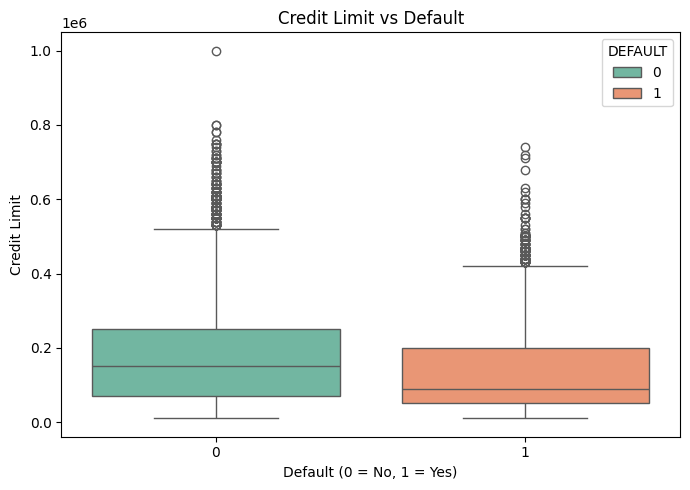

In [9]:
#Boxplot of Credit Limit vs Default
plt.figure(figsize=(7, 5))

# Boxplot of LIMIT_BAL grouped by DEFAULT
sns.boxplot(x='DEFAULT', y='LIMIT_BAL',hue='DEFAULT',data=df, palette='Set2')

plt.title('Credit Limit vs Default')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Credit Limit')
plt.tight_layout()
plt.show()


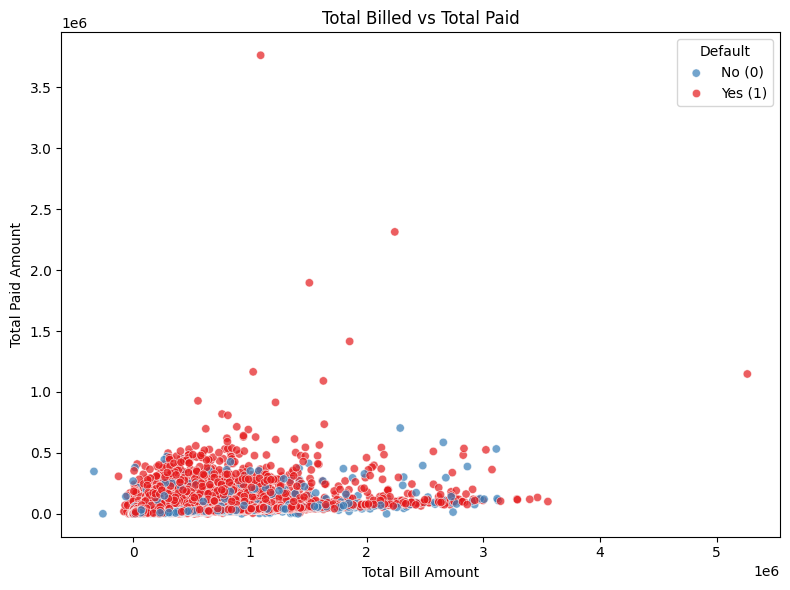

In [10]:
#Scatterplot of Total Billed VS Total Paid
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df,
    x='TOTAL_BILL',
    y='TOTAL_PAID',
    hue='DEFAULT',
    palette='Set1',
    alpha=0.7
)

plt.title('Total Billed vs Total Paid')
plt.xlabel('Total Bill Amount')
plt.ylabel('Total Paid Amount')
plt.legend(title='Default', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()


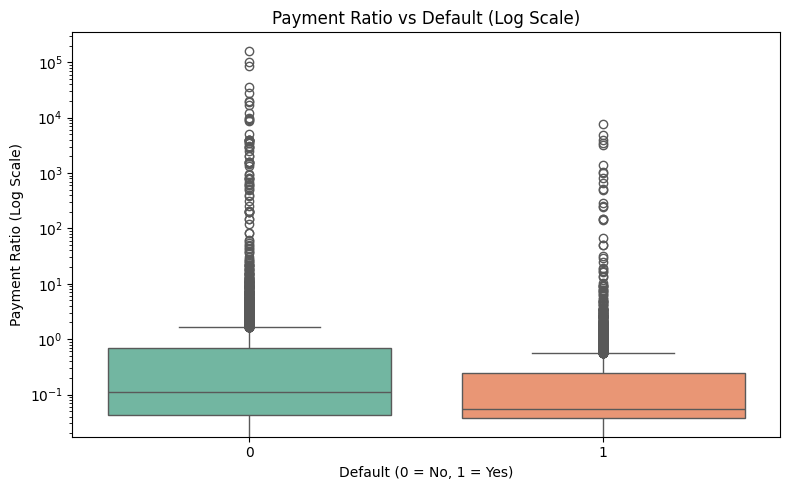

In [11]:
#Boxplot of Payment Ration vs Default
plt.figure(figsize=(8, 5))

sns.boxplot(
    x='DEFAULT',
    y='PAY_RATIO',
    data=df,
    hue='DEFAULT',
    palette='Set2',
    legend=False
)

plt.yscale('log')  
plt.title('Payment Ratio vs Default (Log Scale)')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Payment Ratio (Log Scale)')
plt.tight_layout()
plt.show()


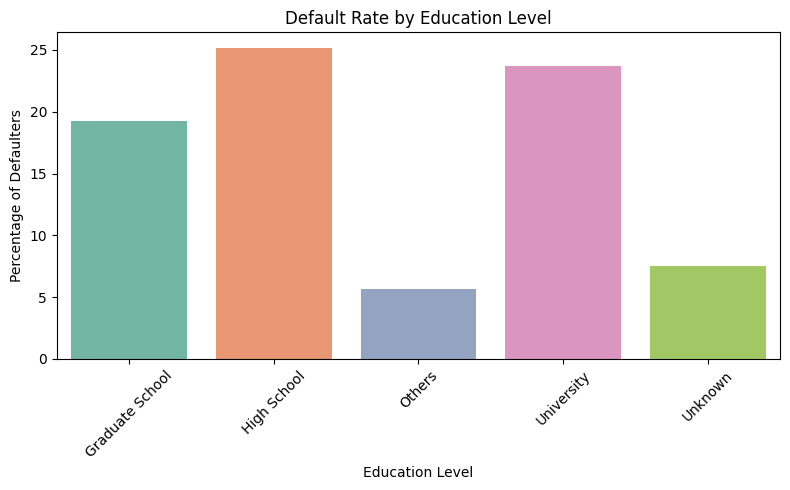

In [12]:
#Barplot of Eduction VS % Defaulter

# Create a new dataframe with percentage of defaulters per education level
edu_df = df.groupby('EDUCATION')['DEFAULT'].mean().reset_index()
edu_df['DEFAULT'] = edu_df['DEFAULT'] * 100  # convert to %
plt.figure(figsize=(8, 5))
sns.barplot(
    x='EDUCATION',
    y='DEFAULT',
    hue='EDUCATION',
    data=edu_df,
    palette='Set2',
    dodge=False,       # so bars don't shift left/right
    legend=False       # we don’t need a separate legend as x already shows education
)

plt.title('Default Rate by Education Level')
plt.ylabel('Percentage of Defaulters')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


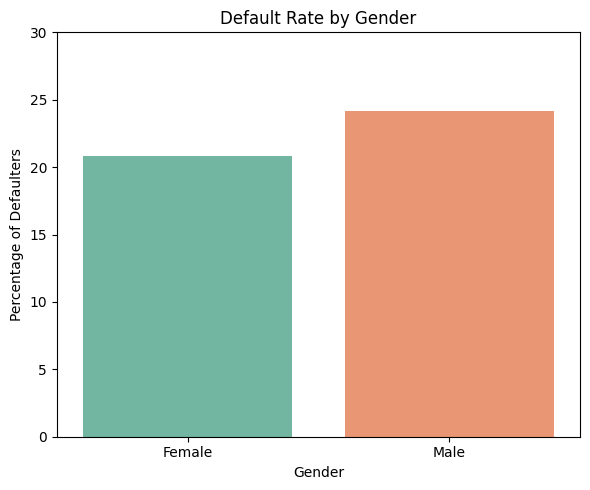

In [13]:

sex_df = df.groupby('SEX')['DEFAULT'].mean().reset_index()
sex_df['DEFAULT'] = sex_df['DEFAULT'] * 100  # convert to %

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(
    x='SEX',
    y='DEFAULT',
    hue='SEX',                
    data=sex_df,
    palette='Set2',
    dodge=False,
    legend=False
)

plt.title('Default Rate by Gender')
plt.ylabel('Percentage of Defaulters')
plt.xlabel('Gender')
plt.ylim(0, 30)
plt.tight_layout()
plt.show()


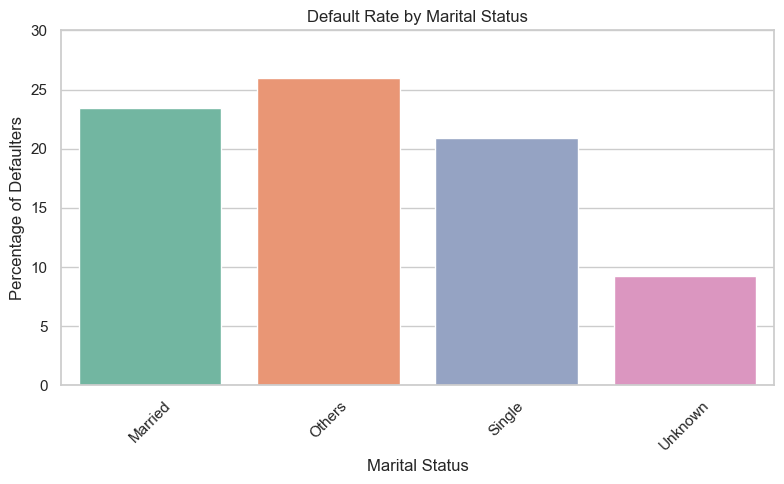

In [62]:
# Marital Status VS Default Rate
marriage_df=df.groupby('MARRIAGE')['DEFAULT'].mean().reset_index()
marriage_df['DEFAULT']=marriage_df['DEFAULT']*100

plt.figure(figsize=(8,5))

sns.barplot(
    x='MARRIAGE',
    y='DEFAULT',
    hue='MARRIAGE',
    data=marriage_df,
    palette='Set2'

)
plt.title('Default Rate by Marital Status')
plt.ylabel('Percentage of Defaulters')
plt.xlabel('Marital Status')
plt.xticks(rotation=45)
plt.ylim(0, 30)
plt.tight_layout()
plt.show()

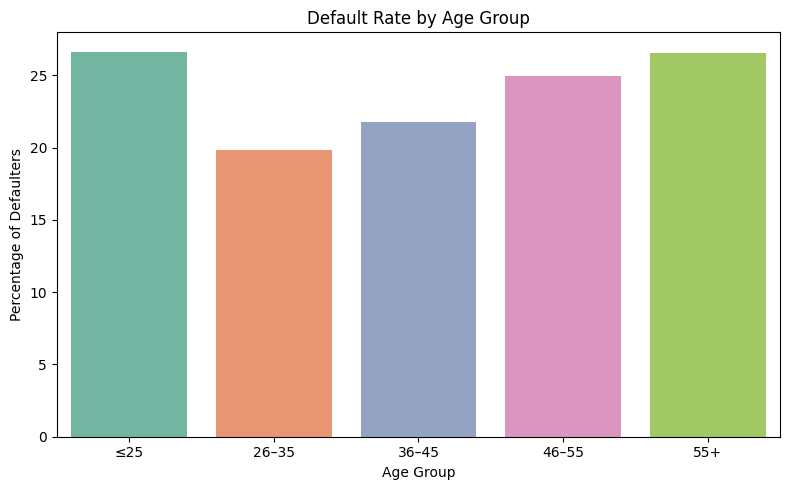

In [14]:
#Age Group VS Default Rate
bins = [0, 25, 35, 45, 55, 100]
labels = ['≤25', '26–35', '36–45', '46–55', '55+']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels)
age_df = df.groupby('AGE_GROUP', observed=True)['DEFAULT'].mean().reset_index()

age_df['DEFAULT'] = age_df['DEFAULT'] * 100

plt.figure(figsize=(8, 5))

sns.barplot(
    x='AGE_GROUP',
    y='DEFAULT',
    hue='AGE_GROUP',          
    data=age_df,
    palette='Set2',
)
plt.title('Default Rate by Age Group')
plt.ylabel('Percentage of Defaulters')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()
